## BDash version 1.0

**Features**
1. Total Units Sold x Months Graph
2. Total Sales x Months Graph

**Aditional Features**
1. Average Sales per month (graph)(add)
2. Total Sales 6 months (graph)(add)

## Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from dash import Dash, html, dcc
import plotly.express as px
from jupyter_dash import JupyterDash

## The data at a glance

**Read .csv file from folder (BFH-LEDE)**

In [4]:
data = pd.read_csv('/Users/rafaelcyin/Documents/GitHub/Bestfer_Solution_JN/data/data.csv')

**Display .csv file as table**

In [5]:
data.head()

,Unnamed: 0,Codigo,Descrição - 31/07/2022,UM,Import?,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Total,Saldo,Freq.,Media,Tempo,FOB,Venda,Ativo,Entrada Prevista
0,1.0,'BFH0003,BF PISTOLA DE COLA 6W,PC,Sim,1781.0,2608.0,2069,2226,1362,1889,11935.0,30150.0,6.0,1989.1670,15.15710,0.01,15.30,S,0.0
1,2.0,'BFH0014,BF JG CHAVE HEX GRANDE C/PONTA BOLA 9PCS ACZ,PC,Sim,121.0,217.0,177,100,115,49,779.0,1641.0,6.0,129.8333,12.63928,0.01,38.30,S,3600.0
2,3.0,'BFH0015,BF JG CH COM BITS 28PCS,PC,Sim,97.0,258.0,150,299,81,199,1084.0,910.0,6.0,180.6667,5.03690,0.01,30.49,S,2400.0
3,4.0,'BFH0016,BF JG CHAVE TORX GRANDE 9PCS AC,PC,Sim,129.0,268.0,138,226,240,153,1154.0,3996.0,6.0,192.3333,20.77643,0.01,38.30,S,0.0
4,5.0,'BFH0020,BF LAMINA P/ARCO DE SERRA 12PCS 24T,PC,Sim,2182.0,3569.0,4371,2663,2037,2623,17445.0,35914.0,6.0,2907.5000,12.35219,0.01,12.60,S,20016.0


In [6]:
data.describe().head()

,Unnamed: 0,Feb-22,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Total,Saldo,Freq.,Media,Tempo,FOB,Venda,Entrada Prevista
count,1692.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.00000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,846.500000,925.291081,1320.194826,1232.954519,1092.533963,991.559362,1097.486119,6660.01987,11951.486407,5.495272,566.880194,59.243418,0.014711,26.445520,2910.747636
std,488.582644,19066.672724,27190.300530,25407.670243,22549.255084,20489.706057,22620.532306,137247.30818,24658.306057,1.382702,1566.443482,90.708251,0.047818,40.393856,12093.642252
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.002830,0.010000,0.010000,0.000000
25%,423.750000,27.000000,40.000000,31.000000,28.000000,28.000000,40.000000,288.00000,2689.250000,6.000000,50.400000,14.060998,0.010000,7.500000,0.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          1692 non-null   float64
 1   Codigo                              1692 non-null   object 
 2   Descrição       -       31/07/2022  1692 non-null   object 
 3   UM                                  1692 non-null   object 
 4   Import?                             1692 non-null   object 
 5   Feb-22                              1693 non-null   float64
 6   Mar-22                              1693 non-null   float64
 7   Apr-22                              1693 non-null   int64  
 8   May-22                              1693 non-null   int64  
 9   Jun-22                              1693 non-null   int64  
 10  Jul-22                              1693 non-null   int64  
 11  Total                               1693 no

In [8]:
data.isna().sum()

Unnamed: 0                            1
Codigo                                1
Descrição       -       31/07/2022    1
UM                                    1
Import?                               1
Feb-22                                0
Mar-22                                0
Apr-22                                0
May-22                                0
Jun-22                                0
Jul-22                                0
Total                                 0
Saldo                                 1
Freq.                                 1
Media                                 1
Tempo                                 1
FOB                                   1
Venda                                 1
Ativo                                 1
Entrada Prevista                      1
dtype: int64

In [9]:
data.size

33860

**Dimensions of data**

In [10]:
data.shape

(1693, 20)

## Handling Missing Data

**Remove `null` values from data**

In [11]:
data = data.dropna()

Remove `null` values

In [12]:
data.isna().sum()

Unnamed: 0                            0
Codigo                                0
Descrição       -       31/07/2022    0
UM                                    0
Import?                               0
Feb-22                                0
Mar-22                                0
Apr-22                                0
May-22                                0
Jun-22                                0
Jul-22                                0
Total                                 0
Saldo                                 0
Freq.                                 0
Media                                 0
Tempo                                 0
FOB                                   0
Venda                                 0
Ativo                                 0
Entrada Prevista                      0
dtype: int64

All `null` values have been removed

## Cleaning Data

**Check if there are any `inactive` items**

In [13]:
data['Ativo'].unique()

array(['S', 'N'], dtype=object)

**Remove`inactive` items (Ativo = N)**

In [14]:
data = data[data['Ativo'].str.contains('N') == False]

In [15]:
data['Ativo'].unique()

array(['S'], dtype=object)

Successfully removed the `inactive` items from the data

## Data Wrangling

### Total Units Sold x Months

**Store column name into a `list`**

In [16]:
column_name = list(data.columns)

**Create `dictionary` to store total sum of sales and their respective months**

In [17]:
total_units = [data[column_name[5]].sum(),data[column_name[6]].sum(),data[column_name[7]].sum(),data[column_name[8]].sum(),data[column_name[9]].sum(),data[column_name[10]].sum()]
months = [column_name[5],column_name[6],column_name[7],column_name[8],column_name[9],column_name[10]]
index = ['Total Units']
units_data = {'Total Units Sold' : total_units, 'Months' : months}

**Create graph to plot `total_units` against `months`**

In [18]:
units_df = pd.DataFrame(units_data)
units_df.head()

,Total Units Sold,Months
0,774161.90,Feb-22
1,1096649.92,Mar-22
2,1012810.00,Apr-22
3,915310.00,May-22
4,827942.00,Jun-22


<AxesSubplot:xlabel='Months'>

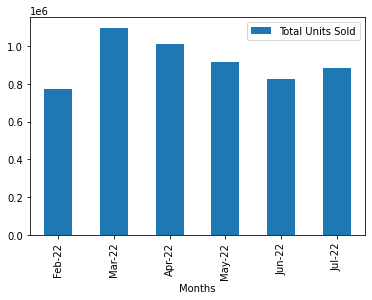

In [19]:
units_df.plot(x = 'Months', y = 'Total Units Sold', kind='bar')

### Total Sales x Months

**Calculate Total Sales**

In [25]:
total_sales = [(data['Feb-22']*data['Venda']).sum(),(data['Mar-22']*data['Venda']).sum(),(data['Apr-22']*data['Venda']).sum(),(data['May-22']*data['Venda']).sum(),(data['Jun-22']*data['Venda']).sum(),(data['Jul-22']*data['Venda']).sum()]
sales_data = {'Total Sales' : total_sales, 'Months' : months}
sales_data

{'Total Sales': [8240201.17,
  11342888.768,
  10084616.85,
  9252150.870000001,
  8061738.369999999,
  9432526.61],
 'Months': ['Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22', 'Jul-22']}

**Create graph to plot `total_sales` against `months`**

In [35]:
sales_df = pd.DataFrame(sales_data)

In [36]:
sales_df.head()

,Total Sales,Months
0,8.240201e+06,Feb-22
1,1.134289e+07,Mar-22
2,1.008462e+07,Apr-22
3,9.252151e+06,May-22
4,8.061738e+06,Jun-22


<AxesSubplot:xlabel='Months'>

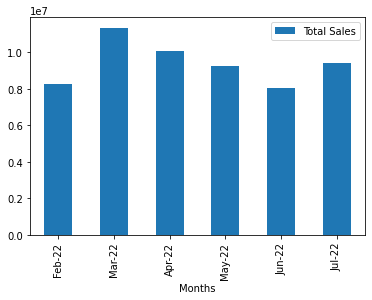

In [37]:
sales_df.plot(x = 'Months', y = 'Total Sales', kind='bar')

### Average Sales per Month

In [38]:
mean_sales = [(data['Feb-22']*data['Venda']).mean(),(data['Mar-22']*data['Venda']).mean(),(data['Apr-22']*data['Venda']).mean(),(data['May-22']*data['Venda']).mean(),(data['Jun-22']*data['Venda']).mean(),(data['Jul-22']*data['Venda']).mean()]
mean_sales_data = {'Average Sales' : mean_sales, 'Months' : months}
mean_sales_data

{'Average Sales': [5070.893027692307,
  6980.239241846153,
  6205.918061538461,
  5693.6313046153855,
  4961.069766153846,
  5804.631759999999],
 'Months': ['Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22', 'Jul-22']}

**Create `DataFrame` to store values**

In [39]:
mean_sales_df = pd.DataFrame(mean_sales_data)
mean_sales_df.head()

,Average Sales,Months
0,5070.893028,Feb-22
1,6980.239242,Mar-22
2,6205.918062,Apr-22
3,5693.631305,May-22
4,4961.069766,Jun-22


<AxesSubplot:xlabel='Months'>

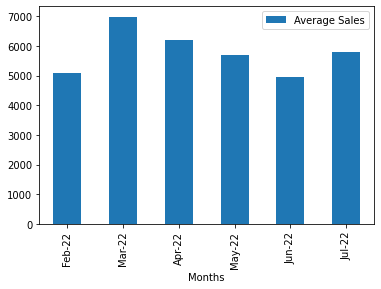

In [40]:
mean_sales_df.plot(x = 'Months', y = 'Average Sales', kind='bar')

### Total Sales 6 Months

In [52]:
total_sales_6months = sales_df['Total Sales'].sum()
month = ['6 Months']
total_sales_6months_data = {'Total Sales 6 Months' : total_sales_6months, 'Month' : month}
total_sales_6months_data

{'Total Sales 6 Months': 56414122.638000004, 'Month': ['6 Months']}

**Create `DataFrame` to store values**

In [56]:
total_sales_6months_df = pd.DataFrame(total_sales_6months_data)
total_sales_6months_df

,Total Sales 6 Months,Month
0,5.641412e+07,6 Months


<AxesSubplot:xlabel='Month'>

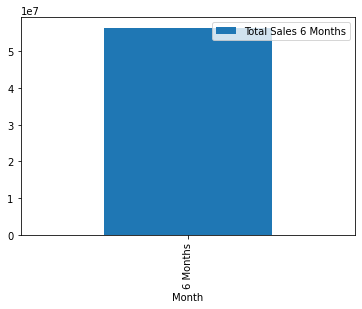

In [57]:
total_sales_6months_df.plot(x = 'Month', y = 'Total Sales 6 Months', kind='bar')

## Create Figures

**Create Figure 1**

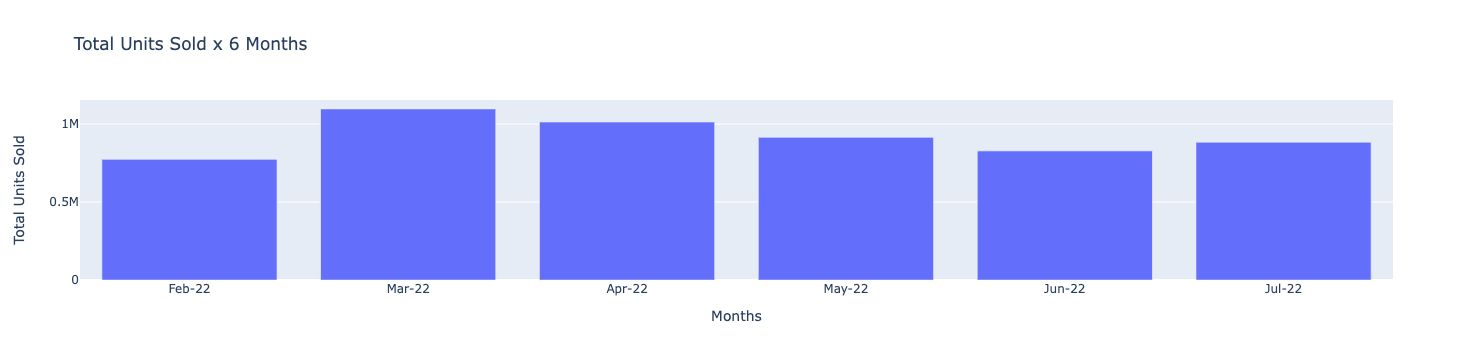

In [61]:
fig1 = px.bar(units_df, x = 'Months', y = 'Total Units Sold', title='Total Units Sold x 6 Months')
fig1

**Create Figure 2**

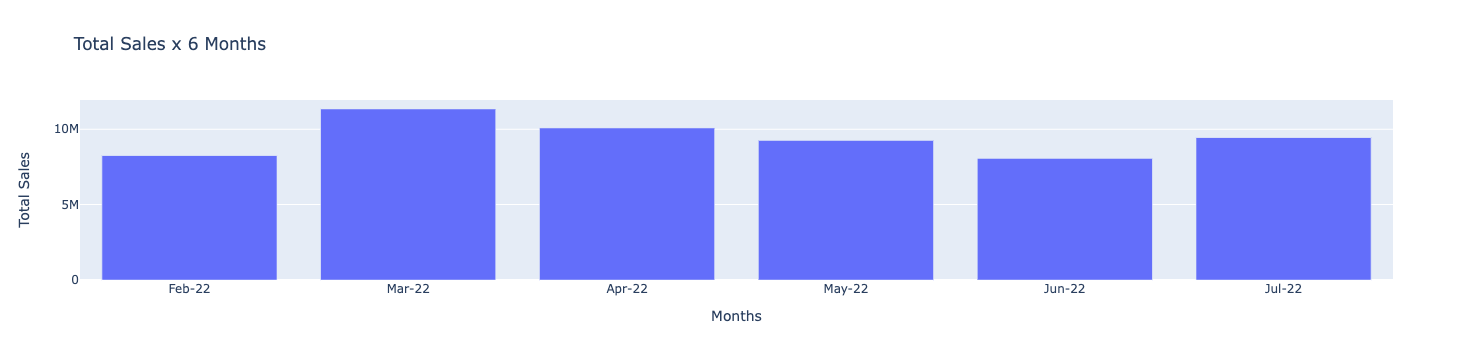

In [62]:
fig2 = px.bar(sales_df, x = 'Months', y = 'Total Sales', title='Total Sales x 6 Months')
fig2

**Create Figure 3 - Average Sales per Month**

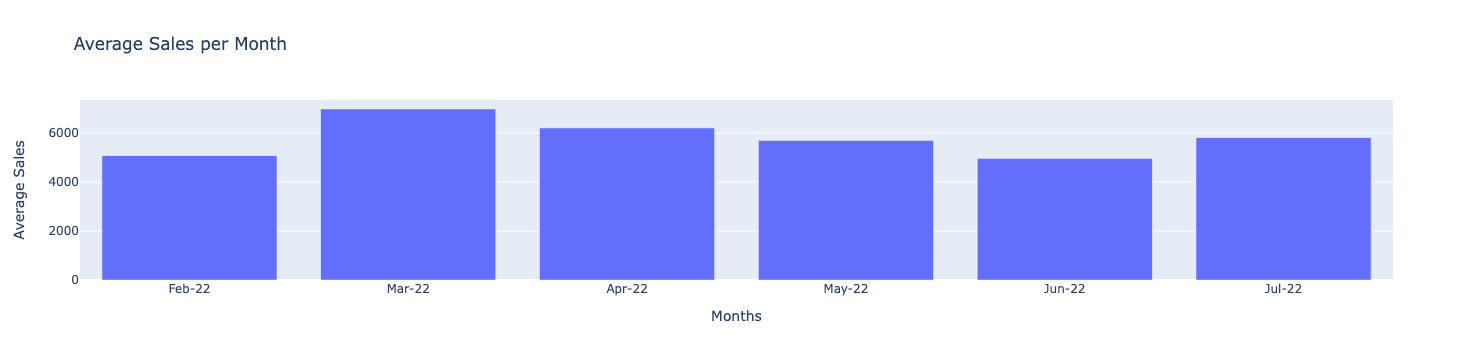

In [63]:
fig3 = px.bar(mean_sales_df, x = 'Months', y = 'Average Sales', title='Average Sales per Month')
fig3

**Create Figure 4 - Total Sales 6 Months**

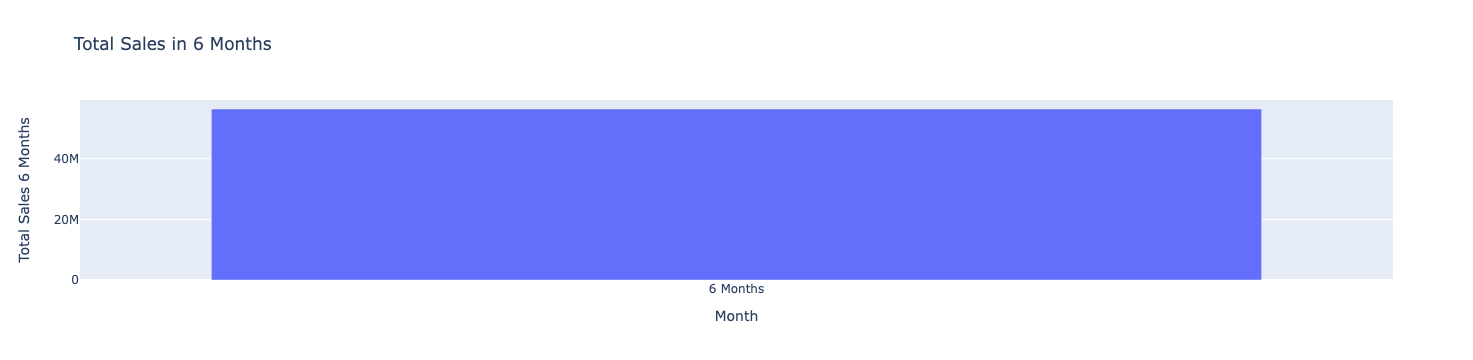

In [64]:
fig4 = px.bar(total_sales_6months_df, x = 'Month', y = 'Total Sales 6 Months', title='Total Sales in 6 Months')
fig4

## Create Dashboard

In [65]:
app = Dash(__name__)

**Create Layout**

In [ ]:
app.layout = html.Div(children=[html.H1(children='Bestfer Dashboard'),
                                        dcc.Graph(
                                            id='figure1',
                                            figure=fig1
                                        ),
                                        dcc.Graph(
                                            id='figure2',
                                            figure=fig2
                                        ),
                                        dcc.Graph(
                                            id='figure3',
                                            figure=fig3
                                        ),
                                        dcc.Graph(
                                            id='figure4',
                                            figure=fig4
                                        )
                                        ])

In [ ]:
app.run_server()